## Alice Tang Computer Vision HW 1

### For this assignment, we will be participating in Kaggle's 'Kannada MNIST' Competition: https://www.kaggle.com/competitions/Kannada-MNIST

### The competition involves creating a machine learning model to classify hand-drawn digits in the Kannada script. The dataset includes grayscale images of digits ranging from zero to nine, each represented as 28x28 pixels. The goal is to build a model that accurately predicts the digit based on the pixel values.

In [20]:
# Importing needed libraries.
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [21]:
# Next, let's load all of our needed datasets and define the file path. 
# This is a notebook that was done within Kaggle, due to the submission requirement nature. 

# Firstly, let's load the Dig-MNIST dataset.
dig_mnist_df = pd.read_csv('/kaggle/input/Kannada-MNIST/Dig-MNIST.csv')

# Next, we will load the test dataset. 
test_data = pd.read_csv('/kaggle/input/Kannada-MNIST/test.csv')

# Now, we are loading the training dataset.
train_data = pd.read_csv('/kaggle/input/Kannada-MNIST/train.csv')

In [22]:
# Before anything, we are going to shuffle the training data. The intention of this is so that the order of data does not introduce any sort of bias in the training process.
# When data is ordered a certain way, the model may learn patterns related to the order instead of examining the actual features.
# Shuffling will make the training process more robust.

# Shuffling the training data.
shuffled_train_data = train_data.sample(frac=1, random_state=42) # We set random_state = 42 for code reproducibility. 

# Split the shuffled training data into train and test sets
train, test = train_test_split(shuffled_train_data, test_size=1/3, random_state=42) # 1/3 of the dataset will be used for testing 

Next, we need to extract the features and labels for both the training and test set. It is important to separate both the features and from the labels, since features are used when training the model, and labels assess model performance.

In [23]:
# Extracting features and labels for training set.
train_images = train.drop("label", axis=1).values
train_labels = train["label"].values

In [24]:
# Extracting features and labels for test set.
test_images = test.drop("label", axis=1).values
test_labels = test["label"].values

Next, we will normalize and scale the pixel values. This step allows us to bring all pixel values to a similar scale, which in turn, improves the training process.

In [25]:
# Normalizing pixel values for both train and test.
train_images = train_images / 255.0
test_images = test_images / 255.0

Here, we must reshape the images in train and test. This is done so that the data is prepared for feeding into a neural network where each pixel will become a separate input feature. 

In [26]:
# Reshaping the images.
train_images = train_images.reshape(train_images.shape[0], -1) # Shaping the array into 1-D format but still maintaining the total number of elements.
test_images = test_images.reshape(test_images.shape[0], -1)

In [27]:
# We will then convert the train and test images type to float32, which keeps a consistent format and since it is often used and the default type for neural networks and in deep learning. 
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")


Alright! We are now officially ready to start building the model. 

For this, we will create a simple neural network using the TensorFlow Keras API. 

In [28]:
# Importing needed packages.
import tensorflow as tf

# Defining the model.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(784,)), # First dense layer of network. ReLU activation function helps with non-linearity in neural networks. 
    tf.keras.layers.Dense(64, activation="relu"), # Second dense layer of network.
    tf.keras.layers.Dense(10, activation="softmax") # Output layer with 10 neurons because there are 10 classes (digits 0 through 9).
])

In [29]:
# Next, we need to compile the model.
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) # Using the Adam optimizer and accuracy as the metric of choice.


In [30]:
# Finally, to train the model. We'll use 20 epochs, but this can easily be adjusted for our needs.
history = model.fit(train_images, train_labels, batch_size=120, epochs=20, verbose=1, validation_data=(test_images, test_labels))

Epoch 1/20
334/334 [==============================] - 2s 4ms/step - loss: 0.3302 - accuracy: 0.9156 - val_loss: 0.1113 - val_accuracy: 0.9670
Epoch 2/20
334/334 [==============================] - 1s 3ms/step - loss: 0.1005 - accuracy: 0.9709 - val_loss: 0.0886 - val_accuracy: 0.9753
Epoch 3/20
334/334 [==============================] - 1s 3ms/step - loss: 0.0753 - accuracy: 0.9779 - val_loss: 0.0791 - val_accuracy: 0.9750
Epoch 4/20
334/334 [==============================] - 1s 3ms/step - loss: 0.0589 - accuracy: 0.9826 - val_loss: 0.0712 - val_accuracy: 0.9783
Epoch 5/20
334/334 [==============================] - 1s 3ms/step - loss: 0.0480 - accuracy: 0.9858 - val_loss: 0.0709 - val_accuracy: 0.9782
Epoch 6/20
334/334 [==============================] - 1s 3ms/step - loss: 0.0389 - accuracy: 0.9884 - val_loss: 0.0636 - val_accuracy: 0.9819
Epoch 7/20
334/334 [==============================] - 1s 3ms/step - loss: 0.0316 - accuracy: 0.9908 - val_loss: 0.0644 - val_accuracy: 0.9819
Epoch 

Let's see how well our model did! We need to evaluate. We'll go even further to examine the training and validation accuracy plot.

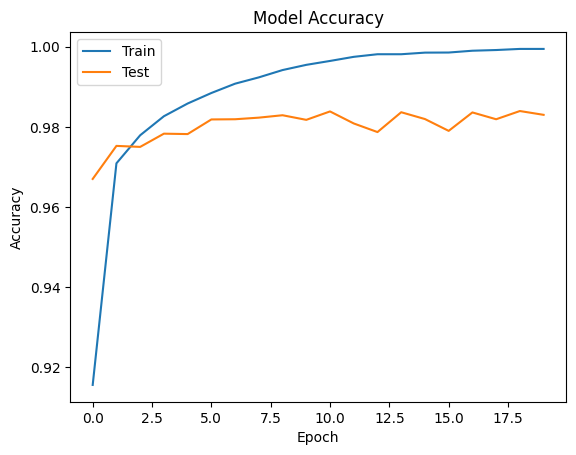

625/625 [==============================] - 1s 2ms/step - loss: 0.0770 - accuracy: 0.9830
Accuracy = 98.299998


In [32]:
# Importing needed packages.
import matplotlib.pyplot as plt 

# Plotting the training and validation accuracy.
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

# Evaluating the model on the test set
_, accuracy = model.evaluate(test_images, test_labels)
print("Accuracy = %2f" % (accuracy * 100))

Here, we obtain an accuracy of 98.29. Pretty good! Alright, let's get ready to make predictions, so we can submit and see how we did.

In [33]:
# Identifying the actual identifier column.
identifier_column = "id"

# Extracting features from the test set and dropping the identifier column. 
test_images_submission = test_data.drop(columns=[identifier_column]).values

# Normalizing the pixel values for submission.
test_images_submission = test_images_submission / 255.0

# Reshaping the images for submission.
test_images_submission = test_images_submission.reshape(test_images_submission.shape[0], -1).astype("float32")




In [34]:
# Generating predictions for the test set.
predictions = model.predict(test_images_submission)


157/157 [==============================] - 0s 1ms/step


In [35]:
# Converting predictions to labels for submission.
predicted_labels = np.argmax(predictions, axis=1)


We are following the sample_submission csv format, where there should be two columns- "id" and "label". We must make sure our submission is formatted as such.

In [36]:
# Loading the sample submission file from Kaggle.
sample_submission = pd.read_csv('/kaggle/input/Kannada-MNIST/sample_submission.csv')

# Replacing the 'Label' column in the sample submission with our predicted labels.
sample_submission['Label'] = predicted_labels

At this point, I notice that there are three columns- id, label, and Label. Label had the predictions we just made, so we'll just adjust the code. After this, everything should be in order. We'll print our submission just to check and make sure it has the correct names before submitting it to the competition.

In [40]:
# Keeping only the 'Label' column and renaming it lowercase for the submission.
sample_submission['label'] = sample_submission['Label']

# Saving the submission to our Kaggle working environment.
sample_submission[['id', 'label']].to_csv('/kaggle/working/submission.csv', index=False)

   id  label
0   0      3
1   1      0
2   2      2
3   3      6
4   4      7


In [38]:
# One last check. 
print(sample_submission.head())


[3 0 2 ... 1 6 3]


And we're ready to submit! From this model, we obtained a private score of 0.9364 and a public score of 0.9344. These are pretty good results considering the model was very quick to train, and is not computationally heavy.